<a href="https://colab.research.google.com/github/bsmingam/TrabajoDeTitulacion/blob/main/Analisis%20exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Se importa las librerias y/o paquetes necesarios para codificar los procesos**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher as SM
from datetime import date
from datetime import datetime
import unicodedata
import numpy as np
import collections

**Realizamos la autentificación para poder acceder a los archivos almacenados en Google Drive**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Obtenemos el link del archivo csv, lo abrimos y se almacena en un dataframe**

In [ ]:
id = '1_ipCNio3jH4bmnW4xi7SLn9s_hwUXVnX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dataset.csv')
df = pd.read_csv('dataset.csv', converters={'cedula': lambda x: str(x)})
df.shape

**Gráficas de la exploración de datos**

In [ ]:
print('El archivo tiene el siguiente número de filas y columnas:', df.shape)
print('Las columnas son:', df.columns)

El archivo tiene el siguiente número de filas y columnas: (36362, 51)
Las columnas son: Index(['facultad', 'carrera', 'periodo_lectivo', 'nivel', 'modalidad',
       'cedula', 'apellidos', 'nombres', 'fecha_nacimiento', 'genero',
       'estado_civil', 'etnia', 'sector_procedencia', 'nacionalidad',
       'pais_nacimiento', 'provincia_nacimiento', 'canton_nacimiento',
       'ciudad_nacimiento', 'direccion_nacimiento', 'pais_actual',
       'provincia_actual', 'canton_actual', 'parroquia_actual',
       'ciudad_actual', 'direccion_actual', 'trabaja', 'ingreso_estudiante',
       'numero_hijos', 'colegio', 'tipo_colegio', 'pais_colegio',
       'provincia_colegio', 'canton_colegio', 'oferta_academica', 'ciclo',
       'numero_matricula', 'malla_curricular', 'estado_matricula', 'paralelo',
       'jornada', 'asignatura', 'estado_asignatura', 'obligatoria',
       'arrastrable', 'asistencia_obligatoria', 'nota_ingresada',
       'nota_ponderada', 'porcentaje_asistencias', 'promedio_matric

In [ ]:
df.describe()

,ingreso_estudiante,numero_hijos,ciclo,numero_matricula,nota_ingresada,nota_ponderada,porcentaje_asistencias,promedio_matricula
count,36362.000000,36362.000000,36362.000000,36362.000000,30825.000000,30825.000000,33145.000000,34947.000000
mean,33.243331,0.163852,4.868324,307027.194186,7.716389,1.326403,87.211890,6.988508
std,113.357141,0.463211,3.068355,158763.528168,1.959020,0.991849,29.146071,2.844206
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,187251.500000,7.100000,0.750000,91.890000,7.180000
50%,0.000000,0.000000,4.000000,343106.000000,8.030000,1.180000,98.330000,8.060000
75%,0.000000,0.000000,7.000000,443732.000000,8.960000,1.630000,100.000000,8.580000
max,1200.000000,10.000000,12.000000,526962.000000,10.000000,21.680000,400.000000,28.150000


In [ ]:
df['estado_matricula'].describe(include='all')

count        35380
unique           4
top       Aprobada
freq         24424
Name: estado_matricula, dtype: object

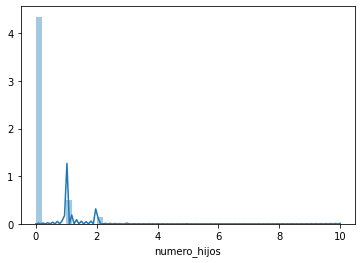

In [ ]:
import seaborn as sns
sns.distplot(df['numero_hijos'])

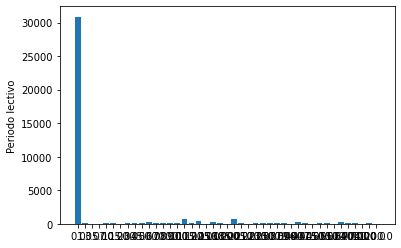

In [ ]:
result = df.ingreso_estudiante
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.bar(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('Periodo lectivo')
plt.show() 

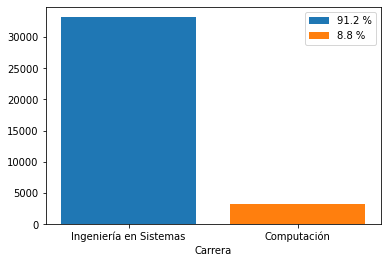

In [ ]:
result = df.carrera
count = result.count()
sistemas, computacion = result.value_counts()

porc_s = str(round(sistemas * 100 / count, 1)) + " %"
porc_c = str(round(computacion * 100 / count, 1)) + " %"

plt.bar('Ingeniería en Sistemas', sistemas)
plt.bar('Computación', computacion)

plt.legend([porc_s, porc_c])
plt.xlabel('Carrera')
plt.show()

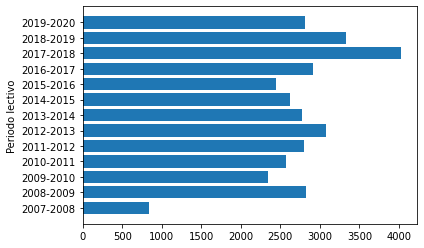

In [ ]:
result = df.periodo_lectivo
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.barh(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('Periodo lectivo')
plt.show() 

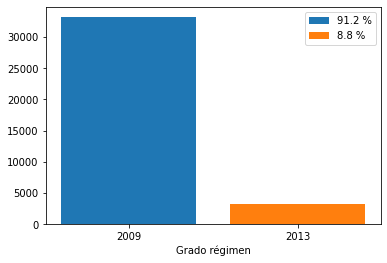

In [ ]:
result = df.nivel
count = result.count()
r_2009, r_2013 = result.value_counts()

porc_r2009 = str(round(r_2009 * 100 / count, 1)) + " %"
porc_r2013 = str(round(r_2013 * 100 / count, 1)) + " %"

plt.bar('2009', r_2009)
plt.bar('2013', r_2013)

plt.legend([porc_r2009, porc_r2013])
plt.xlabel('Grado régimen')
plt.show()

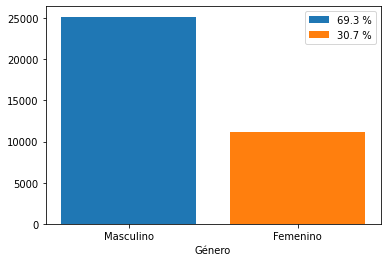

In [ ]:
result = df.genero
count = result.count()
m, f = result.value_counts()

porc_m = str(round(m * 100 / count, 1)) + " %"
porc_f = str(round(f * 100 / count, 1)) + " %"

plt.bar('Masculino', m)
plt.bar('Femenino', f)

plt.legend([porc_m, porc_f])
plt.xlabel('Género')
plt.show()

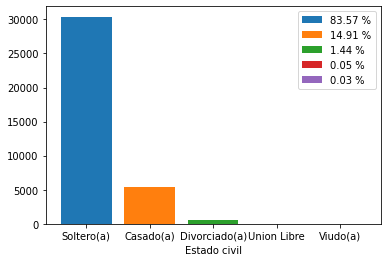

In [ ]:
estado_civil = df.estado_civil
count = estado_civil.count()
result = estado_civil.value_counts()
soltero = result[0]
casado = result[1]
divorciado = result[2]
union_libre = result[3]
viudo = result[4]

porc_s = str(round(soltero * 100 / count, 2)) + " %"
porc_c = str(round(casado * 100 / count, 2)) + " %"
porc_d = str(round(divorciado * 100 / count, 2)) + " %"
porc_ul = str(round(union_libre * 100 / count, 2)) + " %"
porc_v = str(round(viudo * 100 / count, 2)) + " %"

plt.bar('Soltero(a)', soltero)
plt.bar('Casado(a)', casado)
plt.bar('Divorciado(a)', divorciado)
plt.bar('Union Libre', union_libre)
plt.bar('Viudo(a)', viudo)

plt.legend([porc_s, porc_c, porc_d, porc_ul, porc_v])
plt.xlabel('Estado civil')
plt.show()

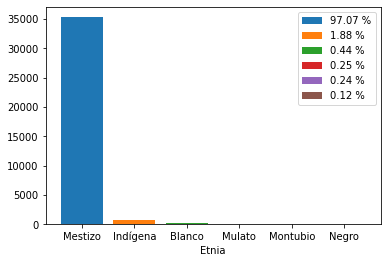

In [ ]:
result = df.etnia
count = result.count()
result = result.value_counts()

mestizo = result[0]
indigena = result[1] + result[4];
blanco = result[2]
mulato = result[3]
montubio = result[5]
negro = result[6]

porc_m = str(round(mestizo * 100 / count, 2)) + " %"
porc_i = str(round(indigena * 100 / count, 2)) + " %"
porc_b = str(round(blanco * 100 / count, 2)) + " %"
porc_mu = str(round(mulato * 100 / count, 2)) + " %"
porc_mo = str(round(montubio * 100 / count, 2)) + " %"
porc_n = str(round(negro * 100 / count, 2)) + " %"

plt.bar('Mestizo', mestizo)
plt.bar('Indígena', indigena)
plt.bar('Blanco', blanco)
plt.bar('Mulato', mulato)
plt.bar('Montubio', montubio)
plt.bar('Negro', negro)

plt.legend([porc_m, porc_i, porc_b, porc_mu, porc_mo, porc_n])
plt.xlabel('Etnia')
plt.show()

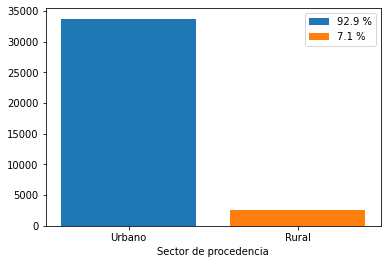

In [ ]:
sector = df.sector_procedencia
count = sector.count()
result = sector.value_counts()
urbano, rural = result

porc_u = str(round(urbano * 100 / count, 1)) + " %"
porc_r = str(round(rural * 100 / count, 1)) + " %"

plt.bar('Urbano', urbano)
plt.bar('Rural', rural)

plt.legend([porc_u, porc_r])
plt.xlabel('Sector de procedencia')
plt.show()

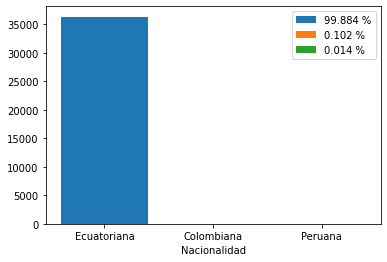

In [ ]:
nacionalidad = df.nacionalidad
count = nacionalidad.count()
result = nacionalidad.value_counts()
ecuatoriana, colombiana, peruana = result

porc_e = str(round(ecuatoriana * 100 / count, 3)) + " %"
porc_c = str(round(colombiana * 100 / count, 3)) + " %"
porc_p = str(round(peruana * 100 / count, 3)) + " %"

plt.bar('Ecuatoriana', ecuatoriana)
plt.bar('Colombiana', colombiana)
plt.bar('Peruana', peruana)

plt.legend([porc_e, porc_c, porc_p])
plt.xlabel('Nacionalidad')
plt.show()

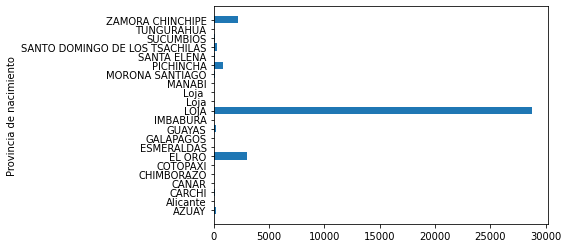

In [ ]:
result = df.provincia_nacimiento
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.barh(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('Provincia de nacimiento')
plt.show() 

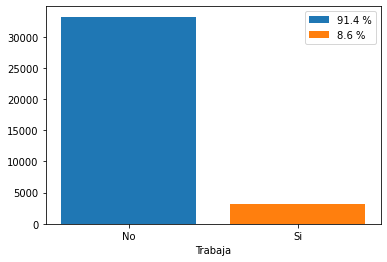

In [ ]:
result = df.trabaja
count = result.count()
result = result.value_counts()

no = result[0]
si = result[1]

porc_si = str(round(si * 100 / count, 1)) + " %"
porc_no = str(round(no * 100 / count, 1)) + " %"

plt.bar('No', no)
plt.bar('Si', si)

plt.legend([porc_no, porc_si])
plt.xlabel('Trabaja')
plt.show()

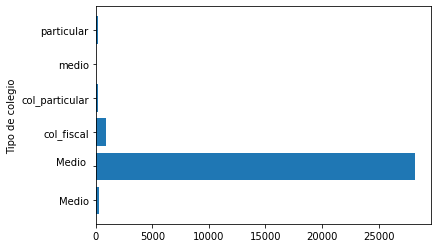

In [ ]:
result = df.tipo_colegio
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.barh(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('Tipo de colegio')
plt.show() 

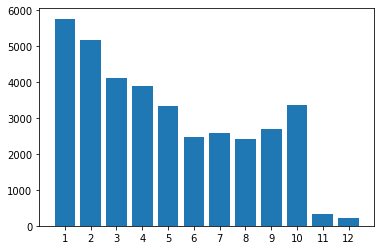

In [ ]:
result = df.ciclo
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.bar(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('')
plt.show() 

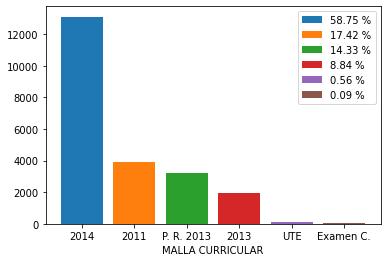

2014                   13108
2011                    3886
PENSUM_REGIMEN_2013     3198
2013                    1973
UTE                      125
Exámen complexivo         20
Name: malla_curricular, dtype: int64


In [ ]:
malla = df.malla_curricular
count = malla.count()
result = malla.value_counts()

m_2014 = result[0]
m_2011 = result[1]
m_pr_2013 = result[2]
m_2013 = result[3]
m_ute = result[4]
examen = result[5]

porc_2014 = str(round(m_2014 * 100 / count, 2)) + " %"
porc_2011 = str(round(m_2011 * 100 / count, 2)) + " %"
porc_pr_2013 = str(round(m_pr_2013 * 100 / count, 2)) + " %"
porc_2013 = str(round(m_2013 * 100 / count, 2)) + " %"
porc_ute = str(round(m_ute * 100 / count, 2)) + " %"
porc_e = str(round(examen * 100 / count, 2)) + " %"

plt.bar('2014', m_2014)
plt.bar('2011', m_2011)
plt.bar('P. R. 2013', m_pr_2013)
plt.bar('2013', m_2013)
plt.bar('UTE', m_ute)
plt.bar('Examen C.', examen)

plt.legend([porc_2014, porc_2011, porc_pr_2013, porc_2013, porc_ute, porc_e])
plt.xlabel('MALLA CURRICULAR')
plt.show()
print(result)

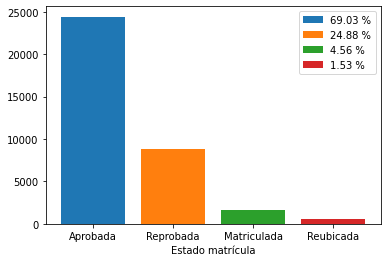

In [ ]:
result = df.estado_matricula
count = result.count()
result = result.value_counts()

aprobada = result[0]
reprobada = result[1]
matriculada = result[2]
reubicada = result[3]

porc_mA = str(round(aprobada * 100 / count, 2)) + " %"
porc_mR = str(round(reprobada * 100 / count, 2)) + " %"
porc_mM = str(round(matriculada * 100 / count, 2)) + " %"
porc_mReu = str(round(reubicada * 100 / count, 2)) + " %"

plt.bar('Aprobada', aprobada)
plt.bar('Reprobada', reprobada)
plt.bar('Matriculada', matriculada)
plt.bar('Reubicada', reubicada)

plt.legend([porc_mA, porc_mR, porc_mM, porc_mReu])
plt.xlabel('Estado matrícula')
plt.show()

matutino      35200
vespertino       49
Name: jornada, dtype: int64


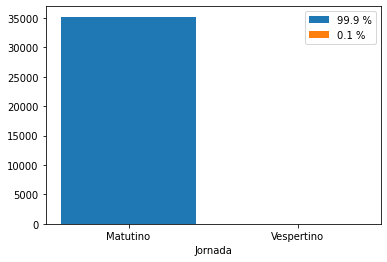

In [ ]:
result = df.jornada
count = result.count()
result = result.value_counts()
print(result)
m = result[0]
v = result[1]

porc_v = str(round(v * 100 / count, 1)) + " %"
porc_m = str(round(m * 100 / count, 1)) + " %"

plt.bar('Matutino', m)
plt.bar('Vespertino', v)

plt.legend([porc_m, porc_v])
plt.xlabel('Jornada')
plt.show()

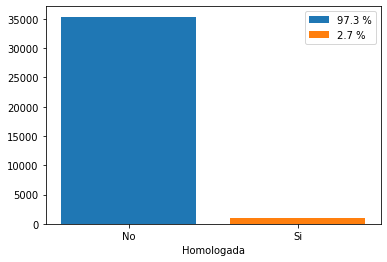

In [ ]:
result = df.homologada
count = result.count()
result = result.value_counts()

no = result[0]
si = result[1]

porc_si = str(round(si * 100 / count, 1)) + " %"
porc_no = str(round(no * 100 / count, 1)) + " %"

plt.bar('No', no)
plt.bar('Si', si)

plt.legend([porc_no, porc_si])
plt.xlabel('Homologada')
plt.show()

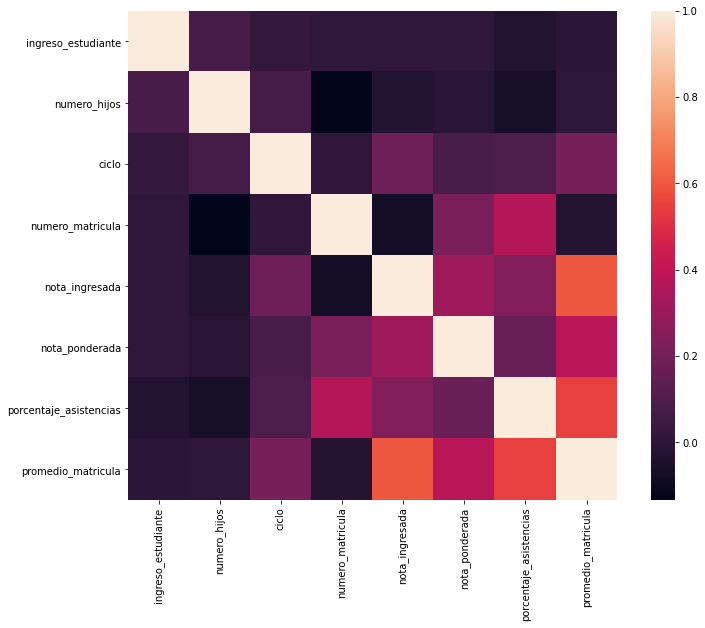

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

**A continuación se precenta el porcentaje de los datos completos según cada columna del dataset**

In [ ]:
total_dataset = len(df) 
count_column = df.count()
result = (count_column * 100) / total_dataset
for r in result:
  print("{:.2f}".format(r),"%")

NameError: ignored